## Data Preparing

### Import data

In [1]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 

In [2]:
df = pd.read_csv("CleanLearn.csv", index_col = 0)

In [3]:
df.dtypes

a00      int64
a01    float64
a02    float64
a03    float64
a04    float64
        ...   
b55    float64
b56    float64
b57    float64
b58     object
y        int64
Length: 79, dtype: object

In [4]:
df.head()

,a00,a01,a02,a03,a04,a05,a06,a07,a08,a09,...,b50,b51,b52,b53,b54,b55,b56,b57,b58,y
8747-13,636,18.49,13.001478,0.775280,-42.793522,24.492023,-10.484932,-1.517119,-39.455910,2.026431,...,18.516575,-4.392650,-22.485001,-6.339779,-49.909943,-12.715166,-5.445779,1.619433,Jun,0
6205-73,427,-97.45,14.502462,-11.561666,15.833394,9.476253,-14.794973,-1.695999,3.610581,-19.892304,...,-17.646489,1.835639,9.106746,-20.796966,16.648858,-13.228720,-0.387335,8.347526,Jul,0
9523-20,516,-35.11,13.827006,-12.302147,49.457466,-0.977925,-43.502495,-1.706023,-13.936122,-22.160076,...,36.870859,6.927548,91.858224,-10.975847,20.381154,-8.805570,1.151833,6.556150,Aug,0
3833-39,612,-12.37,14.226312,6.751264,6.050489,38.089135,-17.085216,-1.546816,33.030833,-31.677786,...,39.426696,5.589082,38.526229,-13.470369,-28.082879,-6.002682,-0.841256,10.545876,May,0
3800-51,621,-32.69,14.365138,-4.912405,-7.350947,-42.798861,-20.029530,-1.490586,11.363373,-19.037034,...,10.752469,-10.031374,10.945061,-17.084093,-98.409776,-10.276715,-3.229062,7.460149,Oct,0


### Get dummies

In [5]:
df = pd.get_dummies(data=df, columns=['code', 'b21', 'b34','b58'])
df.shape

(10426, 105)

### Split data into training and testing dataset

In [6]:
y = df.y
X = df.drop('y', axis=1)

In [7]:
X.head()

,a00,a01,a02,a03,a04,a05,a06,a07,a08,a09,...,b58_Dec,b58_Feb,b58_Jan,b58_Jul,b58_Jun,b58_Mar,b58_May,b58_Nov,b58_Oct,b58_Sep
8747-13,636,18.49,13.001478,0.775280,-42.793522,24.492023,-10.484932,-1.517119,-39.455910,2.026431,...,0,0,0,0,1,0,0,0,0,0
6205-73,427,-97.45,14.502462,-11.561666,15.833394,9.476253,-14.794973,-1.695999,3.610581,-19.892304,...,0,0,0,1,0,0,0,0,0,0
9523-20,516,-35.11,13.827006,-12.302147,49.457466,-0.977925,-43.502495,-1.706023,-13.936122,-22.160076,...,0,0,0,0,0,0,0,0,0,0
3833-39,612,-12.37,14.226312,6.751264,6.050489,38.089135,-17.085216,-1.546816,33.030833,-31.677786,...,0,0,0,0,0,0,1,0,0,0
3800-51,621,-32.69,14.365138,-4.912405,-7.350947,-42.798861,-20.029530,-1.490586,11.363373,-19.037034,...,0,0,0,0,0,0,0,0,1,0


In [8]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 


Number transactions X_train dataset:  (7298, 104)
Number transactions y_train dataset:  (7298,)
Number transactions X_test dataset:  (3128, 104)
Number transactions y_test dataset:  (3128,)


In [9]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 764
Before OverSampling, counts of label '0': 6534 



### Data resampling

In [12]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (13068, 104)
After OverSampling, the shape of train_y: (13068,) 

After OverSampling, counts of label '1': 6534
After OverSampling, counts of label '0': 6534


### Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
decTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [31]:
decTree.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

### Model evaluation

In [32]:
predTree = decTree.predict(X_test)
from sklearn import metrics
from sklearn.metrics import f1_score
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTree's F1-Score: ", f1_score(y_test, predTree, average='weighted'))
print("DecisionTree's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test, predTree, sample_weight=None, adjusted=False))

DecisionTree's Accuracy:  0.8142583120204604
DecisionTree's F1-Score:  0.8263705340225553
DecisionTree's Balanced-Accuracye:  0.5829607599732294


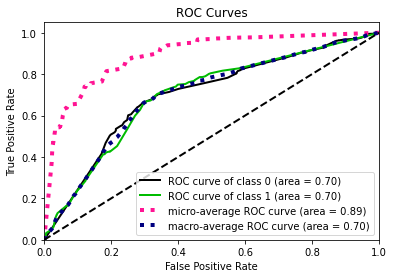

In [33]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas_tree = decTree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_tree)
plt.show()

### Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
          
# Fit rf to the training set    
rf.fit(X_train_res,y_train_res) 


RandomForestClassifier()

### Model evaluation

In [35]:
predForest = rf.predict(X_test)
print("RandomForest's Accuracy: ", metrics.accuracy_score(y_test, predForest))
print("RandomForest's F1-Score: ", f1_score(y_test, predForest, average='weighted'))
print("RandomForest's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predForest))

RandomForest's Accuracy:  0.8986572890025576
RandomForest's F1-Score:  0.854827972697468
RandomForest's Balanced-Accuracye:  0.5179916085015509


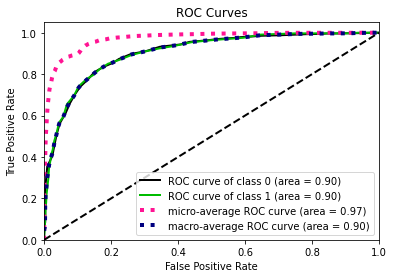

In [36]:
y_probas_forest = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_forest)
plt.show()

### Model tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 79.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [39]:
predRFR = rf_random.predict(X_test)
print("RandomForest's Accuracy: ", metrics.accuracy_score(y_test, predRFR))
print("RandomForest's F1-Score: ", f1_score(y_test, predRFR, average='weighted'))
print("RandomForest's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predRFR))

RandomForest's Accuracy:  0.8967391304347826
RandomForest's F1-Score:  0.8497673895551735
RandomForest's Balanced-Accuracye:  0.5074667522630079


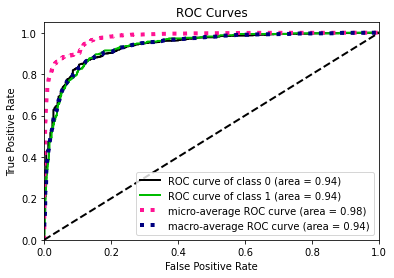

In [41]:
y_probas_rfr = rf_random.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_rfr)
plt.show()

In [52]:
# Extract the best estimator
rf_random.best_params_
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',
                       n_estimators=900)

In [38]:
rf_tune = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',n_estimators=900)
rf_tune.fit(X_train_res,y_train_res)
predRFT = rf_tune.predict(X_test)
print("RandomForest's Accuracy: ", metrics.accuracy_score(y_test, predRFT))
print("RandomForest's F1-Score: ", f1_score(y_test, predRFT, average='weighted'))
print("RandomForest's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predRFT))

RandomForest's Accuracy:  0.8967391304347826
RandomForest's F1-Score:  0.8497673895551735
RandomForest's Balanced-Accuracye:  0.5074667522630079


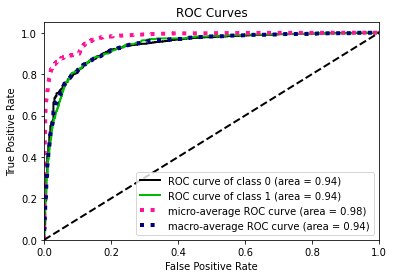

In [39]:
y_probas_rft = rf_tune.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_rft)
plt.show()

### Gradient Boosting Model

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_res,y_train_res)

GradientBoostingClassifier()

### Model evaluation

In [59]:
# Predict test set labels
predBoost = gb.predict(X_test)
print("GradientBoosting's Accuracy: ", metrics.accuracy_score(y_test, predBoost))
print("GradientBoosting's F1-Score: ", f1_score(y_test, predBoost, average='weighted'))
print("GradientBoosting's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predBoost))

GradientBoosting's Accuracy:  0.9028132992327366
GradientBoosting's F1-Score:  0.8803367873370774
GradientBoosting's Balanced-Accuracye:  0.5932416011319679


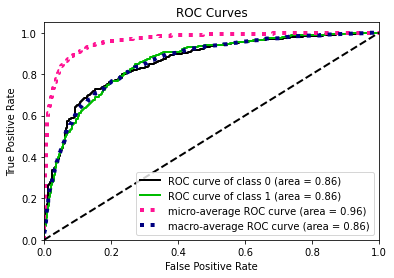

In [61]:
y_probas_boost = gb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_boost)
plt.show()

### Model tuning

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,6,8,10,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = False
# learning rate
learning_rate = [0.15,0.1,0.05,0.01,0.005,0.001]
# subsample
subsample = [0.7,0.75,0.8,0.85,0.9,0.95,1]
# Create the random grid
random_grid_gb = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate' : learning_rate,
               'learning_rate' : subsample
              }
print(random_grid_gb)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['log2', 'auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 4, 6, 8, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'learning_rate': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}


In [ ]:
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid_gb, cv = 3, verbose=2, random_state=53, n_jobs = -1)
gb_random.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [57]:
gb_random.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

### Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear')

In [100]:
lr.fit(X_train_res,y_train_res)

LogisticRegression(C=0.01, solver='liblinear')

In [117]:
# Predict test set labels
predLR = lr.predict(X_test)
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test, predLR))
print("LogisticRegression's F1-Score: ", f1_score(y_test, predLR, average='weighted'))
print("LogisticRegression's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predLR))

LogisticRegression's Accuracy:  0.8698849104859335
LogisticRegression's F1-Score:  0.8789549529011415
LogisticRegression's Balanced-Accuracye:  0.7382711722659121


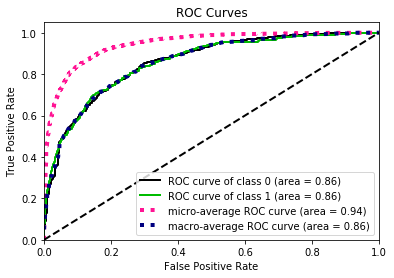

In [104]:
y_probas_lr = lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_lr)
plt.show()

### Normoalize the data

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_norm = scaler.transform(X_train_res)
X_test_norm = scaler.transform(X_test)

In [17]:
lr_norm = LogisticRegression(C=0.01, solver='liblinear')
lr_norm.fit(X_train_norm,y_train_res)

LogisticRegression(C=0.01, solver='liblinear')

In [23]:
# Predict test set labels
predLRN = lr_norm.predict(X_test_norm)
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test, predLRN))
print("LogisticRegression's F1-Score: ", f1_score(y_test, predLRN, average='weighted'))
print("LogisticRegression's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predLRN))

LogisticRegression's Accuracy:  0.8877877237851662
LogisticRegression's F1-Score:  0.8548134864744396
LogisticRegression's Balanced-Accuracye:  0.5294794235785166


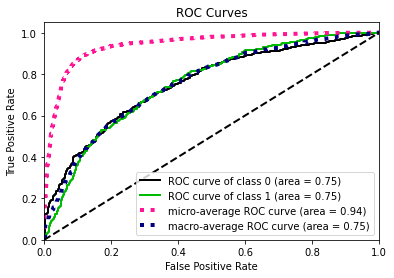

In [29]:
y_probas_lrn = lr_norm.predict_proba(X_test_norm)
skplt.metrics.plot_roc(y_test, y_probas_lrn)
plt.show()

### KNN Model

In [105]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
knn = neigh = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [106]:
# Predict test set labels
predKNN = knn.predict(X_test)
print("KNeighbors's Accuracy: ", metrics.accuracy_score(y_test, predKNN))
print("KNeighbors's F1-Score: ", f1_score(y_test, predKNN, average='weighted'))
print("KNeighbors's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predKNN))

KNeighbors's Accuracy:  0.6355498721227621
KNeighbors's F1-Score:  0.7061259880504758
KNeighbors's Balanced-Accuracye:  0.6209304890018528


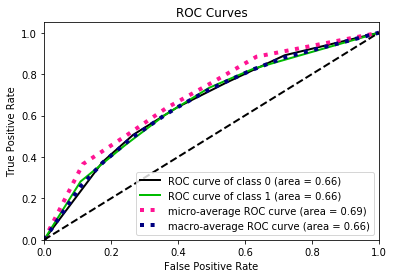

In [110]:
y_probas_knn = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_knn)
plt.show()

In [ ]:
### SVM model

In [116]:
from sklearn import svm
svm = svm.SVC(kernel='rbf',probability=True)
svm.fit(X_train_res,y_train_res) 

SVC(probability=True)

In [119]:
# Predict test set labels
predSVM = svm.predict(X_test)
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(y_test, predSVM))
print("Support Vector Machine's F1-Score: ", f1_score(y_test, predSVM, average='weighted'))
print("Support Vector Machine's Balanced-Accuracye: ",metrics.balanced_accuracy_score(y_test,predSVM))

Support Vector Machine's Accuracy:  0.7394501278772379
Support Vector Machine's F1-Score:  0.7877691634436822
Support Vector Machine's Balanced-Accuracye:  0.759978142362874


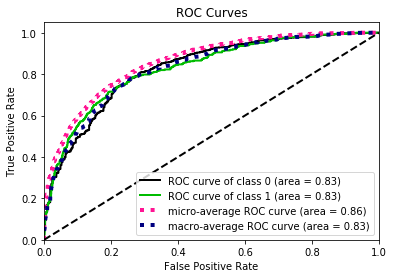

In [121]:
y_probas_svm = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_svm)
plt.show()